In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing import image
from pathlib import Path

In [3]:
label_dict = {'Covid': 0, 'Normal': 1}
reverse_dict = {0:'Covid', 1:'Normal'}

In [4]:
p = Path("G:/Covid-19_Detection_Using_X-Rays/home/covid_dataset/test")

dirs = p.glob("*")

image_data = []
label_data = []

for folder_path in dirs :
    label = (str(folder_path)).split("\\")[-1]
    
    cnt = 0
    print(folder_path)
    
    #Iterate over Folder & pick all images
    for img_path in folder_path.glob("*"):
        img = image.load_img(img_path,target_size=(224,224))
        img_array = image.img_to_array(img)
        
        image_data.append(img_array)
        label_data.append(label_dict[label])
        
        cnt += 1
        
    print(cnt)

G:\Covid-19_Detection_Using_X-Rays\home\covid_dataset\test\Covid
30
G:\Covid-19_Detection_Using_X-Rays\home\covid_dataset\test\Normal
30


In [5]:
Xtest = np.array(image_data)
Ytest = np.array(label_data)

print(Xtest.shape)
print(Ytest.shape)

(60, 224, 224, 3)
(60,)


In [6]:
def drawImg(img,label):
    plt.title(reverse_dict[label])
    plt.axis("off")
    plt.style.use("seaborn")
    plt.imshow(img)
    plt.show()

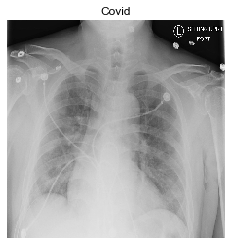

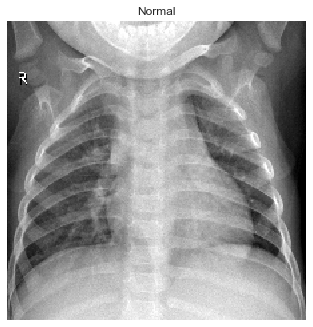

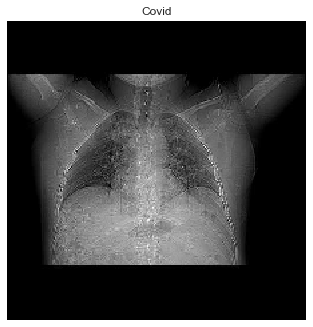

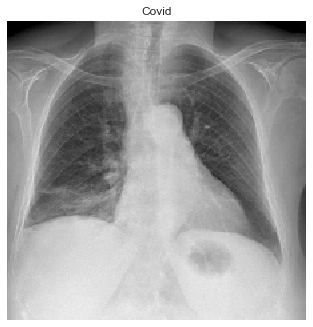

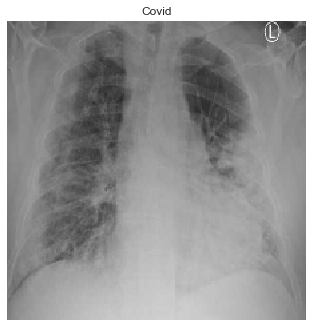

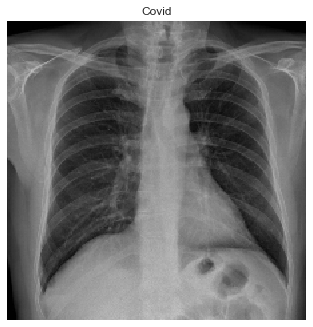

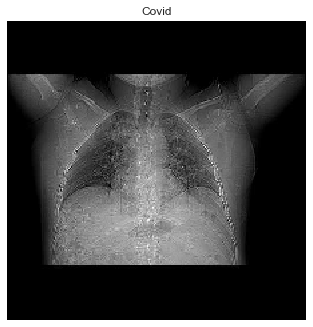

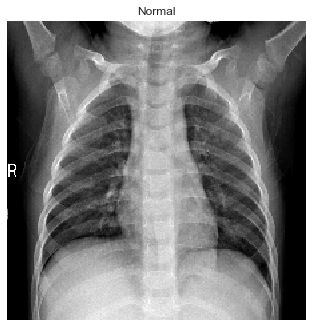

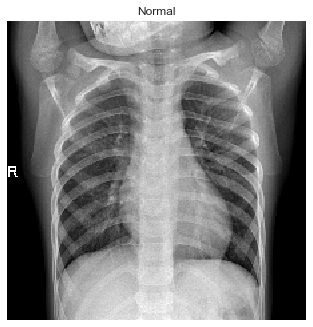

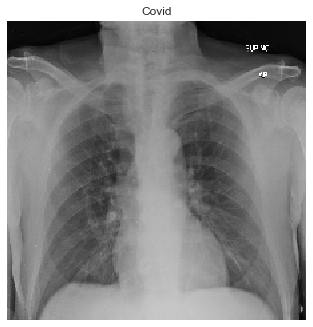

In [7]:
for i in range(10):
    r = np.random.randint(len(label_data))
    drawImg(Xtest[r]/255.0,Ytest[r])

In [9]:
model = load_model("covid_model.hdf5")

In [10]:
outputs = model.predict(Xtest)

In [11]:
outputs = outputs.reshape((outputs.shape[0]))
print(outputs.shape)

(60,)


In [12]:
for i in range(outputs.shape[0]):
    if outputs[i]>0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0
        
outputs = outputs.astype('int')

In [13]:
positiveCount = 0
for i in range(outputs.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.9666666666666667


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [15]:
print(classification_report(outputs,Ytest))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.93      1.00      0.97        28

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [16]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[30  2]
 [ 0 28]]


Confusion matrix, without normalization
[[30  2]
 [ 0 28]]


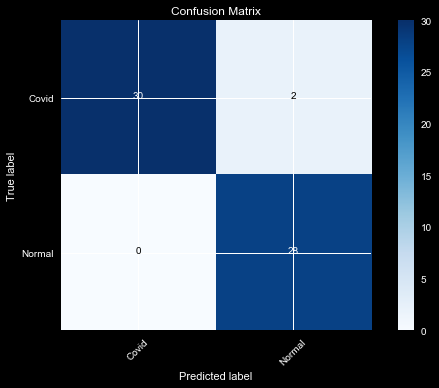

In [17]:
plt.style.use('dark_background')
plot_confusion_matrix(cnf_matrix,classes = ["Covid","Normal"],title="Confusion Matrix")